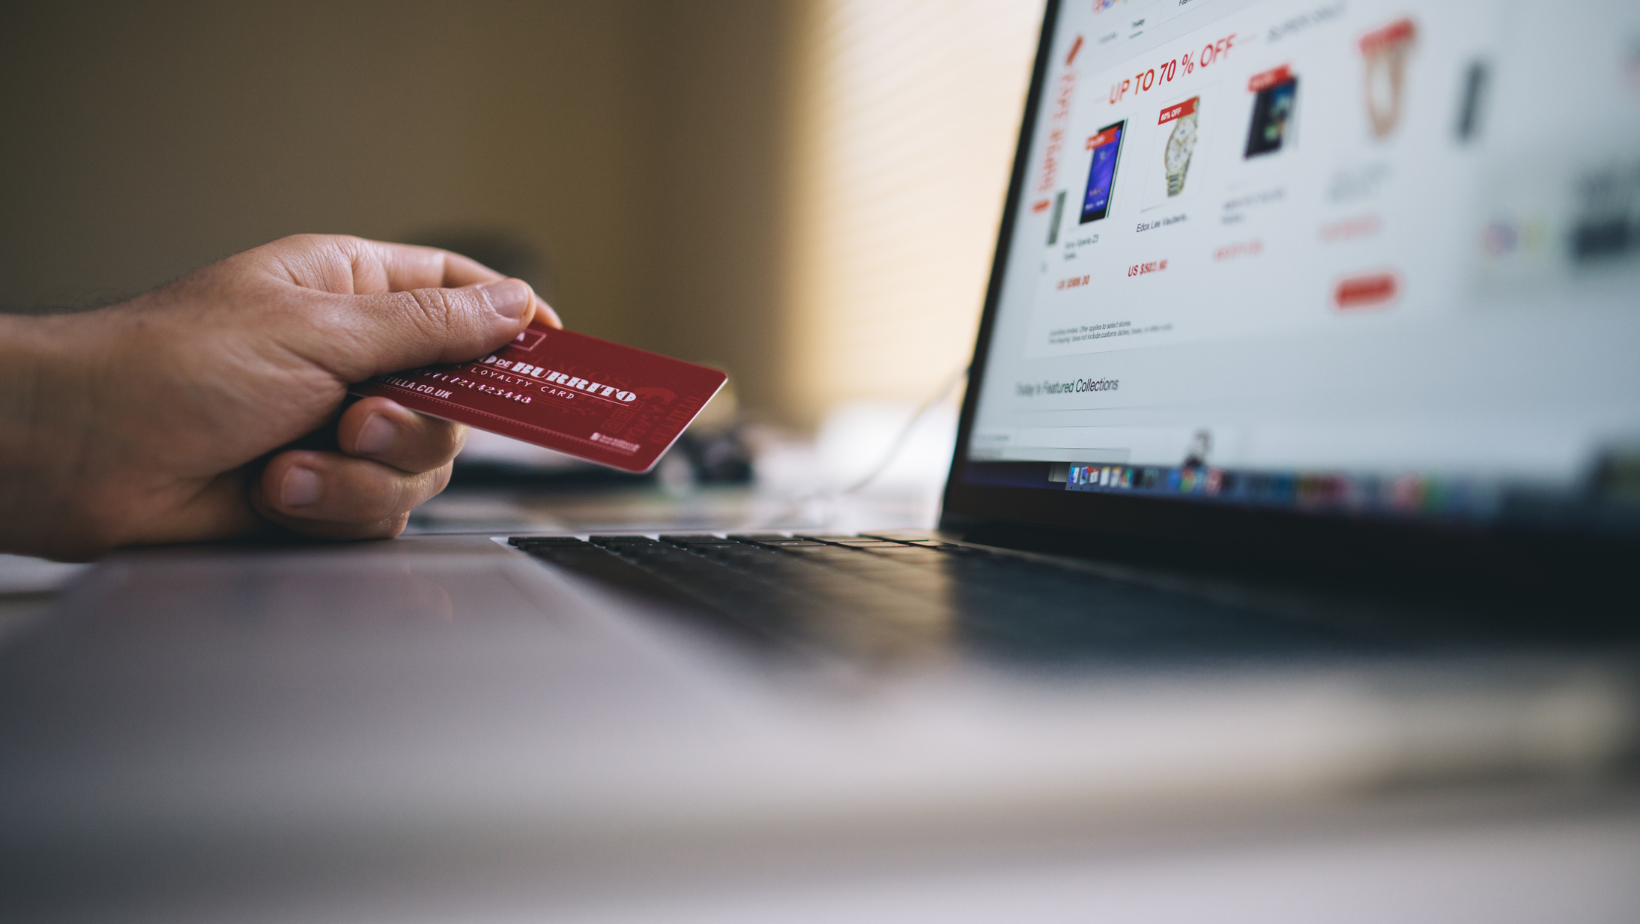

# *Como a Análise do Comportamento dos Usuários pode Impulsionar a Otimização das Despesas de Marketing?*

*Seja muito bem-vindo ao seu estágio no Departamento Analítico da Y.Afisha, onde você terá a emocionante oportunidade de aprimorar suas habilidades analíticas e contribuir significativamente para o sucesso da empresa!*

*Ao longo deste projeto, você terá acesso a logs detalhados do servidor, um arquivo abrangente com todos os pedidos realizados durante o período de janeiro de 2017 a dezembro de 2018, e estatísticas detalhadas sobre as despesas de marketing da Y.Afisha.*

*Iremos analisar:*

*1. **Comportamento do Usuário:** Como as pessoas interagem com nosso produto, explorando os registros de acesso ao Y.Afisha.*
  
*2. **Jornada do Cliente:** Identificar quando os usuários começam a transformar-se em clientes, compreendendo os padrões de compra ao longo do tempo.*

*3. **Valor do Cliente:** Avaliar o valor financeiro que cada cliente agrega à empresa, fornecendo insights fundamentais para estratégias de retenção e crescimento.*

*4. **Cobertura de Despesas:** Determinar quando as despesas de marketing serão cobertas, contribuindo para o planejamento financeiro e o alcance da sustentabilidade econômica.*

### *Sua primeira missão envolve a otimização das despesas de marketing, uma tarefa crucial para impulsionar o desempenho e a eficiência. Vamos começar?*

# *Iniciando Project.*

In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
# carregando dados
df_costs = pd.read_csv('C:/my_workspace/triple_ten/project7/data/costs_us.csv')
df_orders = pd.read_csv('C:/my_workspace/triple_ten/project7/data/orders_log_us.csv')
df_visits = pd.read_csv('C:/my_workspace/triple_ten/project7/data/visits_log_us.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/my_workspace/triple_ten/project7/data/costs_us.csv'

In [4]:
# carregando dados

df_costs = pd.read_csv('/datasets/costs_us.csv')
df_orders = pd.read_csv('/datasets/orders_log_us.csv')
df_visits = pd.read_csv('/datasets/visits_log_us.csv')

# *Começando limpeza e tratamento dos dados.*

### *df_costs*

In [5]:
# informações
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [6]:
# tamanho
df_costs.shape

(2542, 3)

In [7]:
# primeiras linhas
df_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [8]:
# últimas linhas
df_costs.tail()

,source_id,dt,costs
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15
2541,10,2018-05-31,17.60


In [9]:
# sampling
df_costs.sample(15)

,source_id,dt,costs
2473,10,2018-03-22,9.54
1604,5,2017-10-31,238.29
2039,9,2018-01-10,21.43
1515,5,2017-08-03,64.27
1991,9,2017-11-23,29.16
2271,10,2017-09-01,6.60
1900,9,2017-08-24,6.62
544,2,2017-11-29,110.41
1052,3,2018-04-25,448.29
2205,10,2017-06-27,9.76


In [10]:
# nomes das colunas
df_costs.columns

Index(['source_id', 'dt', 'costs'], dtype='object')

*Alterando formato da coluna dt de df_costs.*

In [11]:
# para datetime
df_costs['dt'] = pd.to_datetime(df_costs['dt'])

In [12]:
# renomeando
df_costs.rename(columns={'dt': 'date'}, inplace=True)

In [13]:
# mais informações
df_costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [14]:
# valores únicos de source_id
df_costs.source_id.unique()

array([ 1,  2,  3,  4,  5,  9, 10])

In [15]:
# procurando por duplicados
df_costs.duplicated().sum()

0

*Não temos duplicados.*

In [16]:
# procurando por valores nulos
df_costs.isna().sum()

source_id    0
date         0
costs        0
dtype: int64

*Sem valores nulos no DataFrame.*

In [17]:
# insight inicial
grouped = df_costs.groupby('source_id')['costs'].agg(['sum', 'mean'])
grouped = grouped.reset_index().sort_values(by='sum', ascending=False)
grouped

,source_id,sum,mean
2,3,141321.63,389.315785
3,4,61073.60,168.246832
4,5,51757.10,142.189835
1,2,42806.04,117.922975
0,1,20833.27,57.391928
6,10,5822.49,16.039917
5,9,5517.49,15.199697


In [18]:
# filtrando para obter o somatório
filtered = df_costs[['costs', 'source_id']]
filtered = filtered.groupby('source_id')['costs'].sum().reset_index()
filtered = filtered.sort_values(by='costs', ascending=False)

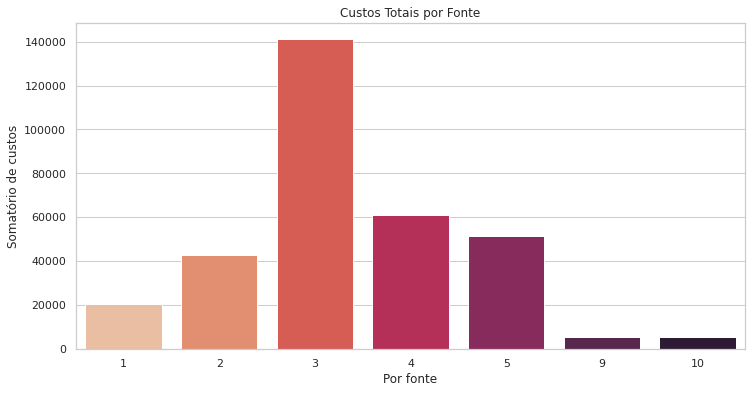

In [19]:
# plotando barras
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(x='source_id', y='costs', data=filtered, palette='rocket_r')
plt.xlabel('Por fonte')
plt.ylabel('Somatório de custos')
plt.title('Custos Totais por Fonte')
plt.show()

*Overview de df_costs:*
- *df_costs não apresenta valores nulos nem duplicados*
- *alteramos o nome da coluna dt para date*
- *alteramos o formato da coluna dt para datetime*
- *existem 7 fontes, conforme apresentado na coluna source_id*
- *a fonte de id 3 tem os maiores custos no somatório*
- *média de custos segue a mesma ordem do somatório por fontes, ou seja, as fontes com maiores custos também possuem as maiores médias*


### *df_orders*

In [20]:
# info gerais
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [21]:
# mais info
df_orders.head()
df_orders.tail()

,Buy Ts,Revenue,Uid
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247
50414,2018-06-01 00:02:00,3.42,83872787173869366


In [22]:
# tamanho
df_orders.shape

(50415, 3)

In [23]:
# nomes das colunas
df_orders.columns

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

*Lower Case nas colunas do DataFrame.*

In [24]:
# transformando para lowercase e renomeando
df_orders.columns = df_orders.columns.str.lower()
df_orders.rename(columns={'buy ts': 'orders_ts', 'uid': 'user_id'}, inplace=True)

In [25]:
# mais algumas informações
df_orders.describe()

,revenue,user_id
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [26]:
# valores únicos
df_orders['orders_ts'].unique()

array(['2017-06-01 00:10:00', '2017-06-01 00:25:00',
       '2017-06-01 00:27:00', ..., '2018-05-31 23:54:00',
       '2018-05-31 23:56:00', '2018-06-01 00:02:00'], dtype=object)

In [27]:
# transformando em datetime
df_orders.orders_ts = pd.to_datetime(df_orders.orders_ts)

In [28]:
# verificando duplicados
df_orders.duplicated().sum()

0

*Sem duplicados.*

In [29]:
# procurando por nulos
df_orders.isna().sum()

orders_ts    0
revenue      0
user_id      0
dtype: int64

In [30]:
# filtrando para obter o somatório
filtered = df_orders[['revenue', 'user_id']]
filtered = filtered.groupby('user_id')['revenue'].sum().reset_index()
filtered = filtered.sort_values(by='revenue', ascending=False)
filtered = filtered.head(12)
filtered

,user_id,revenue
11014,5539673724080479777,11810.18
22073,11149926373378902217,10519.46
35670,17999372575896145244,1979.33
13459,6731421022966725351,1450.68
7206,3644482766749211722,1444.29
19248,9737640335185488211,1310.71
16979,8539015707073391293,1240.76
27482,13888745432979765063,1191.02
3276,1668300487562478408,1163.63
12541,6268225112727843212,1158.32


*Percebemos que apenas 2 usuários gastaram mais de 10 mil.*

In [31]:
# order max
df_orders.revenue.max()

2633.28

*Compra efetuada máxima em apenas um pedido foi de 2633.*

In [32]:
# order mean
df_orders.revenue.mean()

4.999646930477041

*Média foi de quase 5 apenas. Vamos buscar quem foi esse usuário com a maior compra.*

In [33]:
# rastreando
user_n = df_orders[df_orders['revenue'] > 2630]
user_n = user_n.iloc[0,2]
user_n

5539673724080479777

*O mesmo usuário que fez o maior pedido é o mesmo que tem o maior revenue no somatório total.*

In [34]:
# vamos rastrear o comportando dele ao longo do tempo e plotar um gráfico...
user = df_orders[df_orders['user_id'] == user_n]

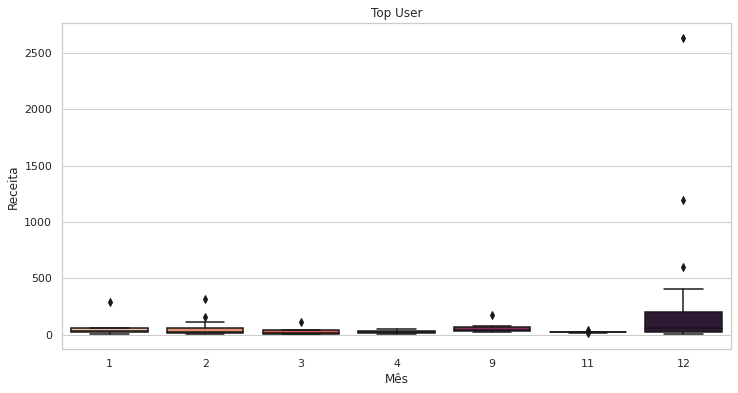

In [35]:
# boxplots dos meses 
plt.figure(figsize=(12, 6))
sns.boxplot( y=user['revenue'], x=user['orders_ts'].dt.month, palette='rocket_r')
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.title('Top User')
plt.show()

*Nota-se que ele, o Top User, gasta mais no último mês do ano.*

*Overview de df_orders:*
- *novamente dataframe sem duplicados ou nulos*
- *temos apenas 3 colunas*
- *renomeamos os nomes das colunas e aplicamos lower case*
- *aplicamos o formato datetime na coluna buy_ts*
- *identificamos que a maior receita única, ou seja numa única compra $2633, foi muito acima da média que é $4.99*
- *conhecemos o nosso Top User e o seu código Id*
- *criamos boxplot rastreando as receitas com o Top User ao longo dos meses*

### *df_visits*

In [36]:
# info
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [37]:
# nomes de colunas
df_visits.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

In [38]:
# lower case nos nomes das colunas e renomeando-as
df_visits.columns = df_visits.columns.str.lower()
df_visits.rename(columns={'end ts': 'end_ts', 'source id': 'source_id', 'start ts': 'start_ts', 'uid': 'user_id'}, inplace=True)

In [39]:
# verificando linhas
df_visits.head()
df_visits.tail()

,device,end_ts,source_id,start_ts,user_id
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485
359399,touch,2017-09-10 13:13:19,2,2017-09-10 13:13:00,18396128934054549559


*Transformando colunas para o formato datetime.*

In [40]:
# end_ts e start_ts
df_visits.end_ts = pd.to_datetime(df_visits.end_ts)
df_visits.start_ts = pd.to_datetime(df_visits.start_ts)

In [41]:
# valores únicos
df_visits.device.unique()

array(['touch', 'desktop'], dtype=object)

In [42]:
# alterando formato da coluna para category
df_visits['device'] = df_visits['device'].astype('category')

In [43]:
# contando os valores touch e desktop
df_visits['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

*Muitos usuários de desktop.*

In [44]:
# duplicados?
df_visits.duplicated().sum()

0

In [45]:
# temos nulos
df_visits.isna().sum()

device       0
end_ts       0
source_id    0
start_ts     0
user_id      0
dtype: int64

In [46]:
# buscando algumas métricas
df_visits.describe()

,source_id,user_id
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [47]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   user_id    359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


*Vamos comparar por dispositivos, os acessos.*

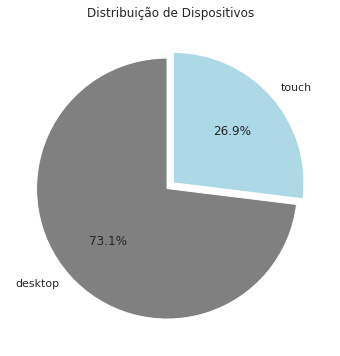

In [48]:
# counting
device_counts = df_visits['device'].value_counts()

# plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', explode=(.033, .033), startangle=90, colors=['gray', 'lightblue'])
plt.title('Distribuição de Dispositivos')
plt.show()

*Overview de df_visits:*
- *sem valores nulos ou duplicados mais uma vez*
- *cinco colunas no dataframe com mais de 350 mil linhas*
- *lower case nos nomes das colunas*
- *transformamos duas colunas para formato datetime, end_ts e start_ts*
- *alteramos o formato da coluna device para category*
- *geramos um pie chart*
- *identificamos maior acesso pela plataforma desktop, com mais do que o dobro de usuários touch*

# *Iniciando EDA - Análise Exploratória dos Dados.*

### *Análise do produto*

***1 - Quantas pessoas usam-no cada dia, semana e mês?***


In [49]:
# preparando dados
df_visits['year'] = df_visits['start_ts'].dt.year
df_visits['month'] = df_visits['start_ts'].dt.month
df_visits['week'] = df_visits['start_ts'].dt.isocalendar().week
df_visits['date'] = df_visits['start_ts'].dt.date

In [50]:
df_visits.head()

,device,end_ts,source_id,start_ts,user_id,year,month,week,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [51]:
# calculando métricas (DAU, WAU & MAU)
dau = (df_visits.groupby('date').agg({'user_id':'nunique'}).mean())
wau = (df_visits.groupby('week').agg({'user_id':'nunique'}).mean())
mau = (df_visits.groupby('month').agg({'user_id':'nunique'}).mean())

print('Average daily user:', int(dau))
print('Average weekly user:', int(wau))
print('Average monthly user:', int(mau))

Average daily user: 907
Average weekly user: 5825
Average monthly user: 23228


***2 - Quantas sessões ocorrem por dia? (um usuário pode realizar várias sessões).***

In [52]:
# agrupando para chegar na média de sessões...
avg_session_per_day = df_visits.groupby('date').agg({'user_id':'count'}).mean()
print('Average session per day:', int(avg_session_per_day), 'Session')

Average session per day: 987 Session


In [53]:
# diferença
diff = abs(dau - avg_session_per_day)
diff

user_id    79.370879
dtype: float64

*Alguns usuários acessam mais de uma vez ao dia, como mostrou a diff.*

***3 - Que comprimento tem cada sessão?***


In [54]:
df_visits['duration'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds
print('Average session length:', (df_visits['duration'].mean()).round(2),'seconds')
print('Average session length:', (df_visits['duration'].mean() / 60).round(2),'minutes')

Average session length: 643.51 seconds
Average session length: 10.73 minutes


*Em média cada sessão dura 643 segundos, ou seja, mais de 10 minutos.*


***4 - Com que frequência os usuários voltam?***

In [55]:
# calculando métrica de frequência semanal
frequency_wau = (dau / wau) * 100
frequency_wau

user_id    15.587069
dtype: float64

In [56]:
# métrica de frequência mensal
frequency_mau = (dau / mau) * 100
frequency_mau

user_id    3.90897
dtype: float64

*Taxa de retorno mensal está abaixo de 4%. Deve-se trabalhar melhor esse parâmetro.*

### *Análise das vendas*

***1 - Quando as pessoas começam a comprar?***

In [57]:
# agrupando e organizando
first_order_ts = df_orders.groupby('user_id')['orders_ts'].min()
first_session_ts = df_visits.groupby('user_id')['start_ts'].min()

first_order_ts.name = 'first_order_ts'
first_session_ts.name = 'first_session_ts'

In [58]:
# unindo as informaçãoes
df_orders = df_orders.join(first_order_ts, on='user_id')
df_orders = df_orders.join(first_session_ts, on='user_id')

In [59]:
# calculando e criando coluna lead time
df_orders['lead_time'] = ((df_orders['first_order_ts'] - df_orders['first_session_ts']).dt.seconds) / (60)
df_orders.head()

,orders_ts,revenue,user_id,first_order_ts,first_session_ts,lead_time
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,15.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,27.0


In [60]:
# algumas métricas....
print('Mediana ->',int(df_orders['lead_time'].median()), 'minutos')
print('Média ->',int(df_orders['lead_time'].mean()), 'minutos')
print()
print('Desvio Padrão ->',int(df_orders['lead_time'].std()), 'minutos')
print('Variância ->',int(df_orders['lead_time'].var()), 'minutos')


Mediana -> 20 minutos
Média -> 284 minutos

Desvio Padrão -> 455 minutos
Variância -> 207750 minutos


In [61]:
# tempos máximos para os pedidos
print('Tempo máximo ->', int(df_orders['lead_time'].max()), 'minutos')
print('Tempo máximo ->', int(df_orders['lead_time'].max() / 60), 'horas')

Tempo máximo -> 1439 minutos
Tempo máximo -> 23 horas


*Identificamos aqui que a mediana e a média para o tempo em que elas começam a comprar na plataforma variam significativamente. Com a mediana em torno de 20 minutos, observamos que a maioria dos usuários inicia suas compras relativamente rápido. No entanto, a média, que é consideravelmente maior (284 minutos), sugere uma distribuição positivamente assimétrica à direita.*

*Além disso, ao explorar o tempo máximo de 23 horas, pode-se definir que a distribuição possui uma cauda longa no lado direito.*

*interessante no futuro fazer uma análise mais detalhada sobre a experiência do usuário, visando identificar estes gaps.*

***2 - Quantos pedidos os clientes fazem durante um determinado período de tempo?***

In [62]:
# começando tratamento dos dados para iniciar o estudo da cohort
df_orders['first_order_month'] = df_orders['first_order_ts'].dt.to_period('M')
df_orders['order_month'] = df_orders['orders_ts'].dt.to_period('M')

In [63]:
# transformando dados
df_orders['cohort_lifetime'] = (df_orders['order_month'].dt.to_timestamp() - df_orders['first_order_month'].dt.to_timestamp()) / np.timedelta64(1, 'M')
df_orders['cohort_lifetime'] = df_orders['cohort_lifetime'].round().astype('int')

In [64]:
# organizando por datas
df_orders['first_order_month'] = df_orders['first_order_month'].dt.strftime('%Y-%m')
df_orders.head()

,orders_ts,revenue,user_id,first_order_ts,first_session_ts,lead_time,first_order_month,order_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1.0,2017-06,2017-06,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11.0,2017-06,2017-06,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2.0,2017-06,2017-06,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,15.0,2017-06,2017-06,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,27.0,2017-06,2017-06,0


In [65]:
# montando pivot table
df_order_pivot = df_orders.pivot_table(index='first_order_month', columns='cohort_lifetime', values='user_id', aggfunc='count')
df_order_pivot = df_order_pivot.fillna('')

In [66]:
# imprimindo
df_order_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,2354.0,177.0,174.0,226.0,292.0,218.0,276.0,174.0,212.0,153.0,96.0,86.0
2017-07,2186.0,100.0,120.0,104.0,72.0,82.0,61.0,50.0,58.0,24.0,53.0,
2017-08,1533.0,108.0,100.0,81.0,85.0,62.0,49.0,78.0,46.0,46.0,,
2017-09,2933.0,219.0,161.0,164.0,67.0,109.0,108.0,56.0,61.0,,,
2017-10,4964.0,314.0,162.0,122.0,129.0,103.0,86.0,125.0,,,,
2017-11,4813.0,397.0,182.0,211.0,136.0,59.0,102.0,,,,,
2017-12,5052.0,270.0,202.0,179.0,86.0,105.0,,,,,,
2018-01,3783.0,224.0,159.0,64.0,78.0,,,,,,,
2018-02,4095.0,222.0,83.0,70.0,,,,,,,,


*As seis primeiras coortes geralmente apresentam um crescimento que atinge seu ápice em dezembro de 2017. Com o tempo, observa-se uma redução natural nos pedidos, à medida que as coortes mais antigas têm um período maior para realizar novas compras.*

*Verificamos que a quantidade de usuários em cada etapa do ciclo de vida da coorte experimenta uma diminuição significativa a cada mês.*

***3 - Qual é o volume médio de uma compra?***

In [67]:
# vamos agrupas em cohorts
df_orders_grouped_by_cohorts = df_orders.groupby(['first_order_month', 'cohort_lifetime']).agg({'revenue': 'sum', 'user_id': 'nunique'})

In [68]:
# dividindo e nomeando as colunas
df_orders_grouped_by_cohorts['revenue_per_user'] = (df_orders_grouped_by_cohorts['revenue'] / df_orders_grouped_by_cohorts['user_id'])
df_orders_grouped_by_cohorts.columns = ['sum_revenue', 'n_users', 'revenue_per_user']

In [69]:
# criando um pivot para melhor visualização...
revenue_pivot = df_orders_grouped_by_cohorts.pivot_table(index='first_order_month', columns='cohort_lifetime', values='revenue_per_user', aggfunc='mean') 
revenue_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.724414,16.09541,17.7068,35.764815,23.506591,22.207761,31.011935,25.033191,19.29569,27.233556,25.681333,9.804151
2017-07,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,
2017-08,5.276518,11.148793,11.851321,12.182955,16.92125,12.139063,9.620333,12.610455,21.07,8.307419,,
2017-09,5.644529,22.188385,13.4452,138.669189,19.881538,26.095,27.437121,16.961351,11.044651,,,
2017-10,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,,,,
2017-11,5.154683,7.339054,6.786583,12.51066,7.457284,4.580833,7.564839,,,,,
2017-12,4.738191,7.816575,39.366019,48.135052,27.4314,23.518413,,,,,,
2018-01,4.135636,8.721228,12.365542,11.199767,4.699556,,,,,,,
2018-02,4.156987,8.61,4.942414,6.941026,,,,,,,,


Text(0.5, 30.5, '')

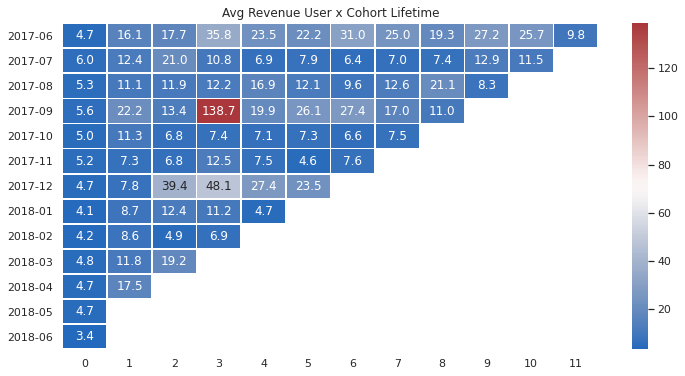

In [70]:
# plotando gráfico
plt.figure(figsize=(12, 6))
plt.title('Avg Revenue User x Cohort Lifetime')
revenue_heatmap = sns.heatmap(revenue_pivot, annot=True, fmt='.1f', linewidths=.66, linecolor= 'white', cmap='vlag')
plt.ylabel('')
plt.xlabel('')

*Quase todas as cohorts apresentam um aumento nas suas compras após o primeiro mês, seguido por uma tendência a diminuir ou estabilizar, sempre bem abaixo de $30 na média. No entanto, observamos um comportamento atípico nas cohorts durante o terceiro e quarto meses.*

*Essa variação fora do padrão sugere a possibilidade de eventos especiais, como promoções, combos ou destaques, que resultaram em um impacto significativo nos resultados de 2 cohorts. Recomenda-se uma investigação mais aprofundada para compreender a natureza desses eventos e avaliar sua influência na dinâmica de compra desses grupos específicos.*

***4 - Quanto dinheiro eles trazem para a empresa (LTV)?***

In [71]:
# agrupando por primeira ordem de compra e número de compradores
cohort_sizes = df_orders.groupby('first_order_month').agg({'user_id': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340


In [72]:
# somando o revenue...
cohorts = df_orders.groupby(['first_order_month','cohort_lifetime', 'order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,cohort_lifetime,order_month,revenue
0,2017-06,0,2017-06,9557.49
1,2017-06,1,2017-07,981.82
2,2017-06,2,2017-08,885.34
3,2017-06,3,2017-09,1931.30
4,2017-06,4,2017-10,2068.58


In [73]:
# merge para criar um novo dataframe
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,cohort_lifetime,order_month,revenue
0,2017-06,2023,0,2017-06,9557.49
1,2017-06,2023,1,2017-07,981.82
2,2017-06,2023,2,2017-08,885.34
3,2017-06,2023,3,2017-09,1931.30
4,2017-06,2023,4,2017-10,2068.58


In [74]:
# calculando LTV e CAC
report['ltv'] =  report['revenue'] / report['n_buyers']
report.head()

,first_order_month,n_buyers,cohort_lifetime,order_month,revenue,ltv
0,2017-06,2023,0,2017-06,9557.49,4.724414
1,2017-06,2023,1,2017-07,981.82,0.485329
2,2017-06,2023,2,2017-08,885.34,0.437637
3,2017-06,2023,3,2017-09,1931.30,0.954671
4,2017-06,2023,4,2017-10,2068.58,1.022531


In [75]:
# criando uma pivot
ltv_pivot = report.pivot_table(index='first_order_month', columns='cohort_lifetime', values='ltv', aggfunc='mean')
ltv_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.724414,0.485329,0.437637,0.954671,1.022531,0.735502,0.95044,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.14182,0.161232,0.147145,0.155673,
2017-08,5.276518,0.471993,0.458482,0.391277,0.494051,0.28354,0.210664,0.405007,0.292212,0.187978,,
2017-09,5.644529,1.117586,0.52093,3.975792,0.400558,0.647067,0.701608,0.24315,0.184006,,,
2017-10,5.003733,0.535763,0.191394,0.157145,0.15156,0.120362,0.084816,0.11547,,,,
2017-11,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,,,,,
2017-12,4.738191,0.260374,0.925097,1.065275,0.31293,0.338047,,,,,,
2018-01,4.135636,0.294758,0.304281,0.142778,0.062698,,,,,,,
2018-02,4.156987,0.278274,0.078515,0.074144,,,,,,,,


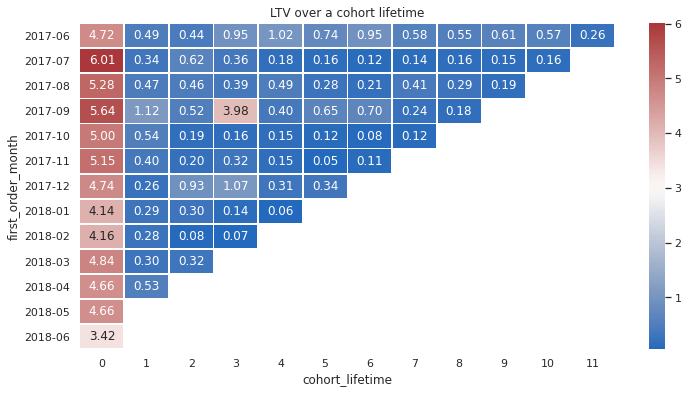

In [76]:
# criando gráfico de heatmap para melhor visualização
plt.figure(figsize=(12, 6))
plt.title('LTV over a cohort lifetime')
order_heatmap = sns.heatmap(ltv_pivot, annot=True, fmt='.2f', linewidths=.66, linecolor='white', cmap='vlag') 

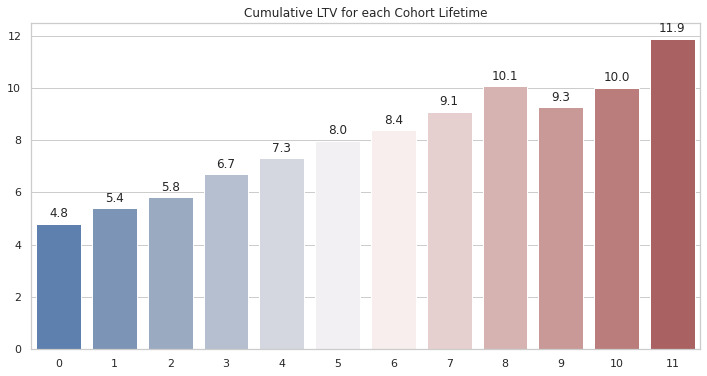

In [77]:
# gerando barras cumulativas
cum_ltv = ltv_pivot.cumsum(axis=1).mean(axis=0).reset_index()
cum_ltv.columns = ['cohort_lifetime', 'cumulative_LTV']

plt.figure(figsize=(12,6))
a = sns.barplot(data=cum_ltv, x='cohort_lifetime', y='cumulative_LTV', palette='vlag')

for g in a.patches:
    a.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), rotation=0, 
                   textcoords = 'offset points')
plt.title('Cumulative LTV for each Cohort Lifetime')
plt.xlabel('')
plt.ylabel('')
plt.show()

*Com estes gráficos gerados, conseguimos perceber que, inicialmente, cada coorte apresenta um LTV praticamente equivalente, sofrendo uma redução na receita média por comprador no mês subsequente. No entanto, ao longo do tempo, observa-se um aumento contínuo e cumulativo em seu valor.*

### ***Marketing Analysis***

In [78]:
# calculando algumas métricas
max_value = df_costs['costs'].max()
min_value = df_costs['costs'].min()
mean_value = df_costs['costs'].mean()
median_value = df_costs['costs'].median()
variance_value = df_costs['costs'].var()
std_deviation_value = df_costs['costs'].std()

# imprimindo...
print(f'Dados df_costs da coluna costs:')
print(f'máximo -> {round(max_value, 2)}')
print(f'mínimo -> {round(min_value, 2)}')
print(f'média -> {round(mean_value, 2)}')
print(f'mediana -> {round(median_value, 2)}')
print(f'variância -> {round(variance_value, 2)}')
print(f'desvio padrão -> {round(std_deviation_value, 2)}')

Dados df_costs da coluna costs:
máximo -> 1788.28
mínimo -> 0.54
média -> 129.48
mediana -> 77.3
variância -> 24428.64
desvio padrão -> 156.3


In [79]:
# agrupando por fonte
expense_per_source = df_costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
expense_per_source['percentage'] = (expense_per_source['costs'] / (df_costs['costs'].sum())) * 100
expense_per_source

,source_id,costs,percentage
0,1,20833.27,6.329769
1,2,42806.04,13.005751
2,3,141321.63,42.937725
3,4,61073.60,18.555981
4,5,51757.10,15.725350
5,9,5517.49,1.676378
6,10,5822.49,1.769046


In [80]:
# datetime
df_costs['month'] = pd.to_datetime(df_costs['date']).dt.to_period('M')

In [81]:
# chamando group by novamente
expense_per_month = df_costs.groupby('month').agg({'costs':'sum'}).reset_index()
expense_per_month['percentage'] = (expense_per_month['costs'] / (df_costs['costs'].sum())) * 100
expense_per_month['month'] = expense_per_month['month'].dt.strftime('%Y-%m')
expense_per_month

,month,costs,percentage
0,2017-06,18015.00,5.473494
1,2017-07,18240.59,5.542035
2,2017-08,14790.54,4.493807
3,2017-09,24368.91,7.404001
4,2017-10,36322.88,11.035974
5,2017-11,37907.88,11.517544
6,2017-12,38315.35,11.641346
7,2018-01,33518.52,10.183926
8,2018-02,32723.03,9.942232
9,2018-03,30415.27,9.241066


*Concluímos que os custos exibem uma notável variação ao longo dos meses, atingindo o dobro em determinados períodos, indicando uma possível sazonalidade.*

*Os custos, consecutivos desde outubro até março, apontam para um padrão consistente. Notavelmente, a Fonte 3 se destaca como a mais onerosa, ultrapassando os 140 mil, enquanto a Fonte 4, a segunda mais custosa, totaliza cerca de 60 mil.*

*Essa disparidade destaca a importância de uma análise mais detalhada dos custos associados à Fonte 3 para identificar fatores e oportunidades de otimização.*

### ***CAC***

In [82]:
# número de visitantes por fonte
source_sizes = df_visits.groupby('source_id').agg({'user_id': 'nunique'}).reset_index()
source_sizes.columns = ['source_id', 'n_visitors']
source_sizes

,source_id,n_visitors
0,1,18999
1,2,26245
2,3,74756
3,4,83525
4,5,56974
5,6,6
6,7,34
7,9,9264
8,10,8067


In [83]:
# unindo as informações
cac_report = source_sizes.join(expense_per_source['costs'], how='left', on = 'source_id')
cac_report['cac'] = cac_report['costs'] / cac_report['n_visitors']
cac_report

,source_id,n_visitors,costs,cac
0,1,18999,42806.04,2.253068
1,2,26245,141321.63,5.384707
2,3,74756,61073.60,0.816973
3,4,83525,51757.10,0.619660
4,5,56974,5517.49,0.096842
5,6,6,5822.49,970.415000
6,7,34,NaN,NaN
7,9,9264,NaN,NaN
8,10,8067,NaN,NaN


#### ***ROI (ROMI)***

In [84]:
# merge...
report = pd.merge(report, expense_per_month[['month', 'costs']], left_on='first_order_month', right_on='month')
report['cac'] = report['costs'] / report['n_buyers']
report.head()

,first_order_month,n_buyers,cohort_lifetime,order_month,revenue,ltv,month,costs,cac
0,2017-06,2023,0,2017-06,9557.49,4.724414,2017-06,18015.0,8.905091
1,2017-06,2023,1,2017-07,981.82,0.485329,2017-06,18015.0,8.905091
2,2017-06,2023,2,2017-08,885.34,0.437637,2017-06,18015.0,8.905091
3,2017-06,2023,3,2017-09,1931.30,0.954671,2017-06,18015.0,8.905091
4,2017-06,2023,4,2017-10,2068.58,1.022531,2017-06,18015.0,8.905091


In [85]:
# pivot table e gerando um acumulado
report['romi'] = report['ltv'] / report['cac']
romi_pivot = report.pivot_table(index='first_order_month', columns='cohort_lifetime', values='romi', aggfunc='mean')
cum_romi_pivot = romi_pivot.cumsum(axis=1).round(2)
cum_romi_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02,0.46,0.49,0.5,0.51,,,,,,,,


Text(0.5, 30.5, '')

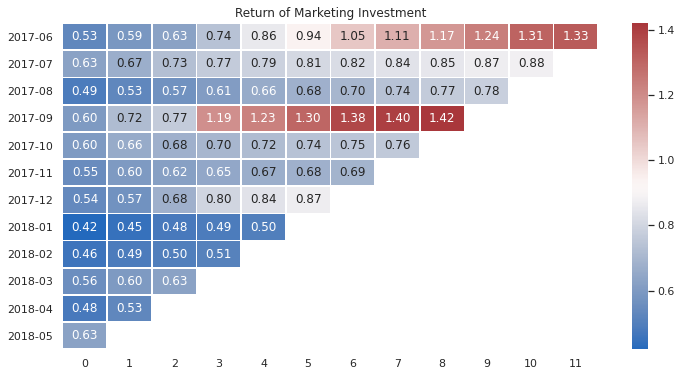

In [86]:
# heatmap do retorno de investimento em marketing
plt.figure(figsize=(12, 6))
plt.title('Return of Marketing Investment')
romi_heatmap = sns.heatmap(cum_romi_pivot, annot=True, fmt='.2f', linewidths=.66, linecolor='white', cmap='vlag')
plt.ylabel('')
plt.xlabel('')

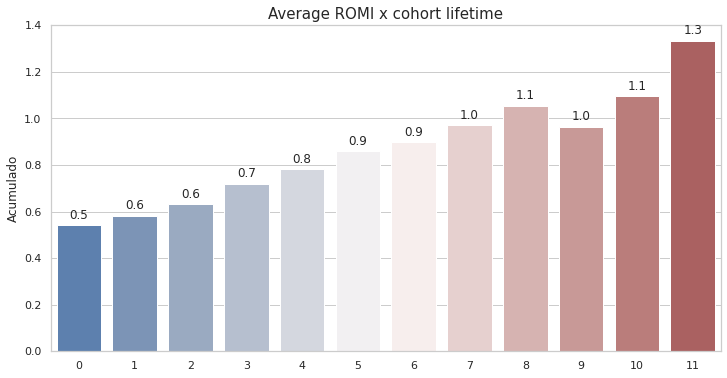

In [87]:
# plotando barras
cum_romi = romi_pivot.cumsum(axis=1).mean(axis=0).reset_index()
cum_romi.columns = ['cohort_lifetime', 'cum_romi']

plt.figure(figsize=(12, 6))
c = sns.barplot(data=cum_romi, x='cohort_lifetime', y='cum_romi', palette='vlag')

for g in c.patches:
    c.annotate(format(g.get_height(), '.1f'), 
               (g.get_x() + g.get_width() / 2., g.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 10), rotation=0, 
               textcoords = 'offset points')

plt.title('Average ROMI x cohort lifetime',fontsize=15)
plt.xlabel('')
plt.ylabel('Acumulado')
plt.show()

*Ao examinar as cohorts, observamos uma tendência positiva de crescimento na retenção ao longo do tempo. Cada valor na tabela reflete a proporção de clientes ativos em relação ao primeiro mês, revelando um aumento consistente nos meses subsequentes em várias cohorts. Destaca-se a retenção notavelmente alta nos primeiros meses da cohort de setembro de 2017 no gráfico Return of Marketing Investment.*

# *Considerações finais*

*Chegamos ao final deste projeto e podemos tirar alguns insights valiosos, como recomendações para a equipe de marketing, dentre eles:*

- *observamos uma queda significativa após o primeiro mês para cada grupo de clientes, indicando que a maioria dos usuários não está realizando compras repetidas.*

- *cada coorte inicia com LTV praticamente igual. Entretanto, há uma redução na receita média por comprador no mês seguinte, seguida de um aumento cumulativo contínuo no valor ao longo do tempo.*

- *nossa análise também revelou que os compradores que optaram por fazer compras repetidas estão adquirindo produtos em volumes superiores aos de seu primeiro pedido.*

*Sobre investimentos podemos declarar:*

- *destinar mais recursos financeiros para fontes de anúncios com baixo custo de aquisição de clientes, tais como as fontes de anúncios 2, 3 e 4.*

- *diminuir o investimento em fontes de anúncios com elevado custo de aquisição de clientes, a exemplo da fonte de anúncios 6.*

- *iniciar investimentos em fontes de anúncios de alto tráfego que ainda não foram exploradas, como as fontes de anúncios 9 e 10.*